# The Golden Gloves
## Topic - Using historical data to predict MLB Hall of Fame status.
#### Data Source - https://www.seanlahman.com/baseball-archive/statistics/  
#### Group Hypothesis - Stats affect 
#### Approach to use for analysis - Aggregate stats for each player in regard to batting, fielding, and pitching. Using this data we can attempt to predict hall of fame status using a classificication machine learning method.

In [745]:
# Importing necessary packages
import pandas as pd


In [746]:
# Pandas setup
pd.set_option('display.max_columns', None)


# Hall of Fame Data
Providing example of how two tables could be combined to create a more readble hall of fame table.

In [747]:
# Importing data
people_df = pd.read_csv("Resources/baseballdatabank-master/core/People.csv")
hall_of_fame_df = pd.read_csv("Resources/baseballdatabank-master/core/HallOfFame.csv")

In [748]:
people_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [749]:
hall_of_fame_df.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [750]:
# Example merge and selecting necessary columns
hof_merged_df = pd.merge(hall_of_fame_df, people_df)
hof_merged_df = hof_merged_df[['playerID','nameLast', 'nameGiven', 'inducted', 'votes', 'yearID', 'needed']]

In [751]:
temp_df = hof_merged_df.loc[hof_merged_df['votes'] > 170]
temp_df.sort_values('votes', ascending=False)

,playerID,nameLast,nameGiven,inducted,votes,yearID,needed
4082,maddugr01,Maddux,Gregory Alan,Y,555.0,2014,429.0
3879,ripkeca01,Ripken,Calvin Edwin,Y,537.0,2007,409.0
4109,johnsra05,Johnson,Randall David,Y,534.0,2015,412.0
3880,gwynnto01,Gwynn,Anthony Keith,Y,532.0,2007,409.0
4083,glavito02,Glavine,Thomas Michael,Y,525.0,2014,429.0
...,...,...,...,...,...,...,...
2633,foxne01,Fox,Jacob Nelson,N,174.0,1979,324.0
2637,foxne01,Fox,Jacob Nelson,N,173.0,1983,281.0
3690,morrija02,Morris,John Scott,N,172.0,2005,387.0
3799,smithle02,Smith,Lee Arthur,N,171.0,2014,429.0


In [752]:
# Narrowing down dataset to those that barely made/missed HOF status
temp_df = hof_merged_df.loc[(hof_merged_df['votes'] > 140) & (hof_merged_df['votes'] < 200)] 
temp_df.sort_values('needed', ascending=False, inplace=True)
temp_df

C:\Users\alex\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,playerID,nameLast,nameGiven,inducted,votes,yearID,needed
3948,martied01,Martinez,Edgar,N,191.0,2011,436.0
3769,trammal01,Trammell,Alan Stuart,N,141.0,2011,436.0
4049,bondsba01,Bonds,Barry Lamar,N,198.0,2014,429.0
3799,smithle02,Smith,Lee Arthur,N,171.0,2014,429.0
4037,schilcu01,Schilling,Curtis Montague,N,167.0,2014,429.0
...,...,...,...,...,...,...,...
250,chancfr01,Chance,Frank Leroy,N,144.0,1946,NaN
482,gehrich01,Gehringer,Charles Leonard,Y,159.0,1949,NaN
1504,ruffire01,Ruffing,Charles Herbert,N,184.0,1964,NaN
1898,applilu01,Appling,Lucius Benjamin,Y,189.0,1964,NaN


# Career Batting Data
Providing a general exmaple of how batting data could be used.

In [753]:
# Importing data
batting_df = pd.read_csv("Resources/baseballdatabank-master/core/batting.csv")

In [754]:
batting_df.drop(columns=['yearID', 'teamID', 'IBB', 'HBP', 'SH', 'SF', 'stint', 'lgID'], inplace=True)
batting_df.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,GIDP
0,abercda01,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0
1,addybo01,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,0.0
2,allisar01,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,1.0
3,allisdo01,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,0.0
4,ansonca01,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,0.0


In [755]:
# Grouping by playerID and yearID, then sorting by home runs by season
career_batting_df = batting_df.groupby(['playerID']).sum()

In [756]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with fielding and pitching
career_batting_df = career_batting_df.add_prefix('b_')

In [757]:
# Sorting dataframe by most home runs
career_batting_df.sort_values('b_HR', ascending=False)

,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP
playerID,,,,,,,,,,,,,
bondsba01,2986,9847,2227,2935,601,77,762,1996.0,514.0,141.0,2558,1539.0,165.0
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,328.0
ruthba01,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0
rodrial01,2784,10566,2021,3115,548,31,696,2086.0,329.0,76.0,1338,2287.0,261.0
pujolal01,2862,10839,1843,3236,669,16,662,2100.0,114.0,41.0,1331,1304.0,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
howarch02,44,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0
howarda01,25,36,6,8,1,0,0,1.0,0.0,0.0,1,8.0,0.0
howarea01,1,0,0,0,0,0,0,1.0,0.0,0.0,0,0.0,0.0


In [758]:
# Showing batting stats of specified player
career_batting_df.loc['bondsba01']

b_G       2986.0
b_AB      9847.0
b_R       2227.0
b_H       2935.0
b_2B       601.0
b_3B        77.0
b_HR       762.0
b_RBI     1996.0
b_SB       514.0
b_CS       141.0
b_BB      2558.0
b_SO      1539.0
b_GIDP     165.0
Name: bondsba01, dtype: float64

# Career Fielding Data

In [759]:
# Importing data
fielding_df = pd.read_csv("Resources/baseballdatabank-master/core/Fielding.csv")

In [760]:
# Dropping inconsistent columns
fielding_df.drop(['lgID', 'PB', 'WP', 'SB', 'CS', 'ZR'], axis=1, inplace=True)

# Dropping unnecessary columns
fielding_df.drop(['yearID', 'stint', 'teamID', 'POS'], axis=1, inplace=True)


In [761]:
# Grouping by playerID to get career stats
career_fielding_df = fielding_df.groupby(['playerID']).sum()

In [762]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with batting and pitching
career_fielding_df = career_fielding_df.add_prefix('f_')

In [763]:
career_fielding_df.head()

,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP
playerID,,,,,,,
aardsda01,331,0.0,1011.0,11,29,3.0,2
aaronha01,3020,2977.0,78414.0,7436,429,144.0,218
aaronto01,387,206.0,6472.0,1317,113,22.0,124
aasedo01,448,91.0,3328.0,67,135,13.0,10
abadan01,9,4.0,138.0,37,1,1.0,3


# Career Pitching Data

In [764]:
# Importing data
pitching_df = pd.read_csv("Resources/baseballdatabank-master/core/Pitching.csv")

In [765]:
# Dropping inconsistent columns
pitching_df.drop(['lgID', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BAOpp'], axis=1, inplace=True)

# Dropping unnecessary columns
pitching_df.drop(['yearID', 'stint', 'teamID'], axis=1, inplace=True)

In [766]:
# Grouping by playerID to get career stats
career_pitching_df = pitching_df.groupby(['playerID']).sum()

In [767]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with batting and pitching
career_pitching_df = career_pitching_df.add_prefix('p_')

In [768]:
career_pitching_df.head()

,p_W,p_L,p_G,p_GS,p_CG,p_SHO,p_SV,p_IPouts,p_H,p_ER,p_HR,p_BB,p_SO,p_ERA,p_WP,p_BK,p_BFP,p_GF,p_R
playerID,,,,,,,,,,,,,,,,,,,
aardsda01,16,18,331,0,0,0,69,1011,296,160,41,183,340,46.75,12,1,1475.0,141,169
aasedo01,66,60,448,91,22,5,82,3328,1085,468,89,457,641,45.41,22,3,4730.0,235,503
abadfe01,8,29,384,6,0,0,2,992,309,135,42,116,280,40.81,10,2,1399.0,97,143
abbeybe01,22,40,79,65,52,0,1,1704,686,285,18,192,161,28.07,18,0,2568.0,14,442
abbeych01,0,0,1,0,0,0,0,6,6,1,0,0,0,4.50,1,0,12.0,1,3


# Exporting Custom Datasets to CSV files

In [769]:
# Exporting career batting dataframe to csv
career_batting_df.to_csv('Resources/custom-tables/career-batting.csv')

# Exporting career fielding dataframe to csv
career_fielding_df.to_csv('Resources/custom-tables/career-fielding.csv')

# Exporting career pitching dataframe to csv
career_pitching_df.to_csv('Resources/custom-tables/career-pitching.csv')

# Creating Full Dataset containing:
* Hall of Fame Players (playerID, inductedStatus)
* Career Batting Data
* Career Fielding Data
* Career Pitching Data

In [770]:
# Merging all relevant datasets

# Merging hall of fame and batting dataframes
train_df = pd.merge(hall_of_fame_df, career_batting_df, left_on='playerID', right_on='playerID')

# Appending fielding data
train_df = pd.merge(train_df, career_fielding_df, left_on='playerID', right_on='playerID')

# Appending pitching data
train_df = pd.merge(train_df, career_pitching_df, left_on='playerID', right_on='playerID')

In [771]:
# Removing all non-Players from dataset
train_df = train_df[train_df['category'] == 'Player']

In [772]:
# Cleaning data table
train_df = train_df.drop(['playerID', 'yearID', 'votedBy', 'category', 'needed_note', 'needed', 'ballots', 'votes'], axis=1)
train_df = train_df.dropna()

In [773]:
train_df.head()

,inducted,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP,p_W,p_L,p_G,p_GS,p_CG,p_SHO,p_SV,p_IPouts,p_H,p_ER,p_HR,p_BB,p_SO,p_ERA,p_WP,p_BK,p_BFP,p_GF,p_R
0,Y,3035,11436,2247,4189,724,295,117,1944.0,896.0,178.0,1249,608.0,0.0,2954,725.0,19266.0,6507,410,278.0,113,0,0,3,0,0,0,1,15,6,2,0,2,0,4.50,0,0,20.0,2,2
1,Y,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0,2436,0.0,0.0,4787,569,179.0,86,94,46,163,148,107,17,4,3664,974,309,10,441,488,36.80,25,4,5006.0,11,398
2,Y,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5
3,N,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5
4,Y,647,1687,151,362,50,12,7,165.0,20.0,1.0,116,218.0,0.0,643,266.0,10032.0,313,1506,57.0,44,373,188,636,552,435,79,29,14366,4219,1135,90,848,2507,47.69,115,8,18943.0,73,1620


# Machine Learning Using Logistic Regression
Using classification to predict inductedStatus based on all stats within dataset.

In [774]:
# Importing required packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [775]:
# assigning data
y = train_df[['inducted']].values
X = train_df.drop(['inducted'], axis=1)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [776]:
# Normalizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data using standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [777]:
# Creating and fitting logistic regression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
result = logisticRegr.fit(X_train_scaled, y_train.ravel())

In [778]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.12531328320802004


In [779]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix

predictions = logisticRegr.predict(X_test)

cm = confusion_matrix(y_test, predictions)

print(cm)

[[ 26 346]
 [  3  24]]


In [780]:
# Display coefficients of values considered by model
import numpy as np
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logisticRegr.coef_))], axis = 1)
coefficients

,0,0
0,b_G,-0.971018
1,b_AB,0.323399
2,b_R,0.058273
3,b_H,-0.119102
4,b_2B,0.284386
5,b_3B,0.378061
6,b_HR,-0.288527
7,b_RBI,0.351058
8,b_SB,0.058214
9,b_CS,-0.078508


In [781]:
# Displaying classification report of model
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           N       0.90      0.07      0.13       372
           Y       0.06      0.89      0.12        27

    accuracy                           0.13       399
   macro avg       0.48      0.48      0.13       399
weighted avg       0.84      0.13      0.13       399



# Visualizing Logistic Regression Model

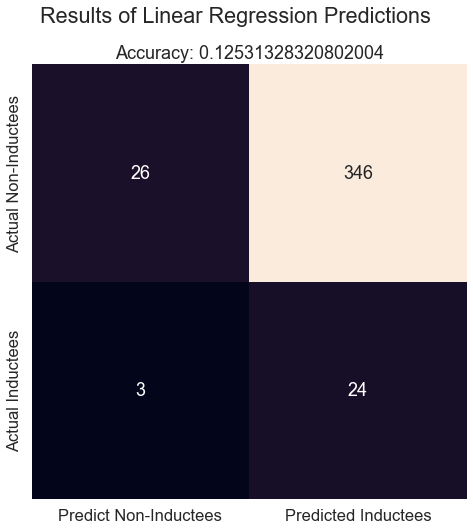

In [782]:
# Creating visual of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Increasing plot size
sns.set(rc = {'figure.figsize': (15,8)})

# Increasing default text size
sns.set(font_scale=1.5)

# Creating heatmap
sns.heatmap(
    cm,             # data given to map
    annot=True,     # annotating numbers to squares
    square=True,    # making all sectors equal squares
    xticklabels=['Predict Non-Inductees', 'Predicted Inductees'],
    yticklabels=['Actual Non-Inductees', 'Actual Inductees'],
    cbar=False,     # disabling color bar
    fmt='g'         # forcing standard number notation
)

# Adding title to plot
plt.suptitle('Results of Linear Regression Predictions')
plt.title(f'Accuracy: {score}')

# Displaying plot
plt.show()

# Machine Learning using Deep Learning

In [783]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [784]:
train_df['inducted']

0       Y
1       Y
2       Y
3       N
4       Y
       ..
1603    N
1604    N
1605    N
1606    N
1607    N
Name: inducted, Length: 1596, dtype: object

In [785]:
# Encoding inducted column
enc = OneHotEncoder(sparse=False)

# transforming the column into binary values
encode_df = pd.DataFrame(enc.fit_transform(train_df[['inducted']]))

# naming columns
encode_df.columns = ['NOT_INDUCTED', 'IS_INDUCTED']

# dropping unnecessary column
encode_df.drop(['NOT_INDUCTED'], 1, inplace=True)

# if value is 1, that line was inducted

C:\Users\alex\AppData\Local\Temp/ipykernel_19228/3144943625.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  encode_df.drop(['NOT_INDUCTED'], 1, inplace=True)


In [786]:
# Merging encoded data and dropping old
train_df = train_df.merge(encode_df, left_index=True, right_index=True)

train_df.drop('inducted', 1, inplace=True)

train_df.head()

C:\Users\alex\AppData\Local\Temp/ipykernel_19228/1023743882.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df.drop('inducted', 1, inplace=True)


,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP,p_W,p_L,p_G,p_GS,p_CG,p_SHO,p_SV,p_IPouts,p_H,p_ER,p_HR,p_BB,p_SO,p_ERA,p_WP,p_BK,p_BFP,p_GF,p_R,IS_INDUCTED
0,3035,11436,2247,4189,724,295,117,1944.0,896.0,178.0,1249,608.0,0.0,2954,725.0,19266.0,6507,410,278.0,113,0,0,3,0,0,0,1,15,6,2,0,2,0,4.50,0,0,20.0,2,2,1.0
1,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0,2436,0.0,0.0,4787,569,179.0,86,94,46,163,148,107,17,4,3664,974,309,10,441,488,36.80,25,4,5006.0,11,398,1.0
2,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5,1.0
3,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5,0.0
4,647,1687,151,362,50,12,7,165.0,20.0,1.0,116,218.0,0.0,643,266.0,10032.0,313,1506,57.0,44,373,188,636,552,435,79,29,14366,4219,1135,90,848,2507,47.69,115,8,18943.0,73,1620,1.0


In [787]:
# assigning data
y = train_df[['IS_INDUCTED']].values
X = train_df.drop(['IS_INDUCTED'], axis=1).values

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)


In [788]:
# Scaling data using StandardScaler
scaler = StandardScaler()

# Fitting the scale
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [789]:
# Define the model

# Defiining input layer
n_input_features = len(X_train[0])

# Defining hidden layers
hidden_nodes_layer1 = 39
hidden_nodes_layer2 = 39
hidden_nodes_layer3 = 39

# defining model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=n_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 39)                1560      
                                                                 
 dense_41 (Dense)            (None, 39)                1560      
                                                                 
 dense_42 (Dense)            (None, 39)                1560      
                                                                 
 dense_43 (Dense)            (None, 1)                 40        
                                                                 
Total params: 4,720
Trainable params: 4,720
Non-trainable params: 0
_________________________________________________________________


In [794]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
33/33 [==============================] - 0s 810us/step - loss: 0.1257 - accuracy: 0.9485
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9524
Epoch 3/100
33/33 [==============================] - 0s 904us/step - loss: 0.1161 - accuracy: 0.9475
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9495
Epoch 5/100
33/33 [==============================] - 0s 771us/step - loss: 0.1165 - accuracy: 0.9485
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9495
Epoch 7/100
33/33 [==============================] - 0s 779us/step - loss: 0.1158 - accuracy: 0.9524
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9485
Epoch 9/100
33/33 [==============================] - 0s 779us/step - loss: 0.1158 - accuracy: 0.9485
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9495

In [795]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

18/18 - 0s - loss: 1.0911 - accuracy: 0.9243 - 101ms/epoch - 6ms/step
Loss: 1.0911164283752441, Accuracy: 0.9243243336677551


In [796]:
from sklearn.metrics import confusion_matrix

y_pred = (nn.predict(X_test_scaled) > 0.5).astype('int32')

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[513   8]
 [ 34   0]]


# Visiualizing Deep Learning Model

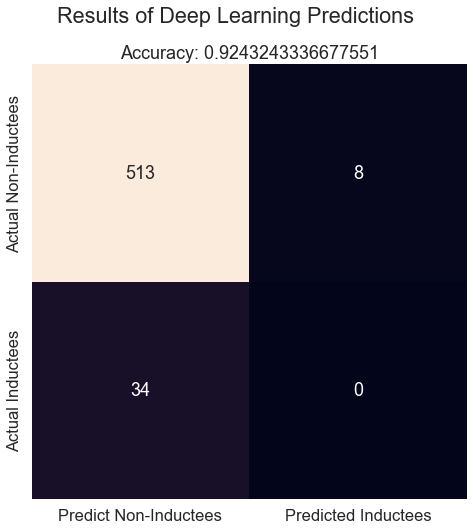

In [797]:
# Creating visual of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Increasing plot size
sns.set(rc = {'figure.figsize': (15,8)})

# Increasing default text size
sns.set(font_scale=1.5)

# Creating heatmap
sns.heatmap(
    cm,             # data given to map
    annot=True,     # annotating numbers to squares
    square=True,    # making all sectors equal squares
    xticklabels=['Predict Non-Inductees', 'Predicted Inductees'],
    yticklabels=['Actual Non-Inductees', 'Actual Inductees'],
    cbar=False,     # disabling color bar
    fmt='g'         # forcing standard number notation
)

# Adding title to plot
plt.suptitle('Results of Deep Learning Predictions')
plt.title(f'Accuracy: {model_accuracy}')

# Displaying plot
plt.show()

In [805]:
# Starting to experiment with over sampling to improve accuracy
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()

ModuleNotFoundError: No module named 'imblearn'